### 1 Классическая теория вероятностей

### Ответ 1

(a) Для решения задачи, представим как в общем виде можно расставить ладьи так, чтобы они не били друг друга
Первую ладью можно разместить n способами. Вторую (n-1) и так далее до n-ной ладьи. Учитывая, что доска квадратная получаем, что А = n * (n-1) * (n-2) * ... * 2 * 1 = n!

In [37]:
import math

n = 8

#А способов разместить ладьи, чтобы они не били друг друга
A = math.factorial(n)

#all любых способов раставить n ладей на шахматной доске n на n
C = int(math.factorial(n**2) / (math.factorial(n) * math.factorial((n**2 - n))))

print('Вероятность A = {} / {} = {}'.format(A, C, A/C))

Вероятность A = 40320 / 4426165368 = 9.109465337988249e-06


(b) Для решения этой задачи воспользуемся формулой включений-исключений.
Сколько есть всего способой расставить ладьи не угрожающие друг другу мы уже выяснили. Теперь нам нужно из этого числа отнять количество способов расставить ладьи на главной диагонали, когда они не бьют друг друга. Если мы разместим 1 ладью на диагонали. Для размещения второй у нас остается (n-1)! способов. После размещения двух (n-2)! и так далее до n.

В общем виде решение будет выглядеть вот так:

$$B_{n} = n!\left(\frac{1}{2!}-\frac{1}{3!}+\frac{1}{4!}-...+\frac{(-1)^n}{n!}\right)$$

Также формулу можно записать рекурентно:

$$B_{n} = (n - 1)(B_{n-1} + B_{n-2})$$


In [30]:
n = 8
def chess(n):
    if n == 1:
        return 0
    if n == 2:
        return 1
    else:
        return (n-1)*(chess(n-1) + chess(n-2))
    
B = chess(n)

print('Вероятность B = {} / {} =  {}'.format(B, C, B/C))

Вероятность B = 14833 / 4426165368 =  3.351207821388385e-06


### Ответ 2

(a) Мы наблюдаем зависимые события вложенные друг в друга. Пусть событие А - на всех кубиках выпали 6-ки, событие В - хотя бы на одном кубике выпала 6-ка.
$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)}{P(B)} = \frac{\frac{1}{6}*\frac{1}{6}*\frac{1}{6}}{\frac{1}{6}*\frac{5}{6}*\frac{5}{6}} = 1*\frac{6}{30}*\frac{6}{30} = \frac{1}{25} = 0.04$$

(b) Шанс выбросить 2 кости из 3 с одинаковыми значениями:
$$P(B)=3*\frac{6*1*5}{216}+\frac{6*1*1}{216}=\frac{96}{216}$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)}{P(B)} = \frac{\frac{1}{216}}{\frac{96}{216}} = \frac{216}{20736} \approx 0.01041(6)$$

### Ответ 3

Пусть вероятность дожить до 80 P(A) = 1/5 и вероятность дожить до 60 P(B) = 1/2. Поскольку мы наблюдаем условную вероятность, то шанс дожить до 80 при условии, что мы дожили до 60 будет

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(A)}{P(B)} = \frac{\frac{1}{5}}{\frac{1}{2}} = \frac{2}{5} = 0.4$$

### Ответ 4

In [46]:
# Вероятность брака
bad_a = 0.1
bad_b = 0.2
bad_c = 0.15
# Шанс выбрать пару обуви конкретной макри
type_a = 40 / 100
type_b = 30 / 100
type_c = 30 / 100

#(a) Воспользуемся формулой полной вероятности
good_pair = type_a * (1-bad_a) + type_b * (1-bad_b) + type_c * (1-bad_c)
print('Шанс выбрать хорошую пару: ' + str(round(good_pair,3)))

#(b) Воспользуемся формулой Байеса
bad_pair = type_a * bad_a + type_b * bad_b + type_c * bad_c
bad_is_b = bad_b * type_b / bad_pair
print('Шанс выбрать вторую пару, при условии, что выбрана плохая: ' + str(round(bad_is_b,3)))

Шанс выбрать хорошую пару: 0.855
Шанс выбрать вторую пару, при условии, что выбрана плохая: 0.414


### 2 Распределения

### Ответ 1

(a) Равномерное

(b) Пуассон

(c) Пуассон

(d) Биномиальное

(e) Нормальное

### Ответ 2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

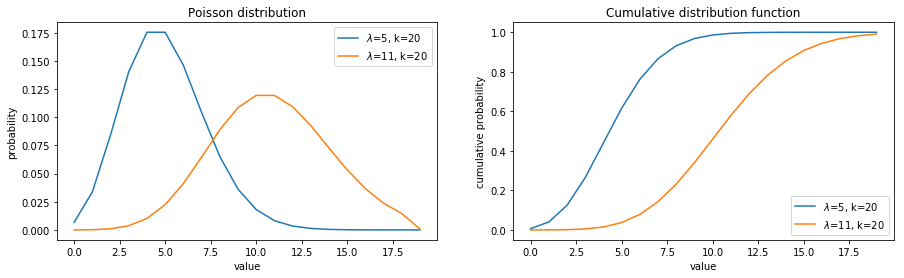

In [70]:
# Распределение Пуассона
x_1= np.arange(0,20,1)
x_2= np.arange(0,20,1)

l_1 = 5
l_2 = 11

y_1 = []
y_2 = []
for i in x_1:
    y_1.append((l_1**i / math.factorial(i)) * (math.e ** (-1 * l_1)))
for i in x_2:
    y_2.append((l_2**i / math.factorial(i)) * (math.e ** (-1 * l_2)))
    
fig, ax = plt.subplots(1,2, figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x_1, y_1, label='$\lambda$=5, k=20')
plt.plot(x_2, y_2, label='$\lambda$=11, k=20')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Poisson distribution')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
y_11 = sts.poisson.cdf(x_1, 5)
y_22 = sts.poisson.cdf(x_2, 11)
plt.plot(x_1, y_11, label='$\lambda$=5, k=20')
plt.plot(x_2, y_22, label='$\lambda$=11, k=20')
plt.xlabel('value')
plt.ylabel('cumulative probability')
plt.title('Cumulative distribution function')
plt.legend(loc='lower right')

plt.show()

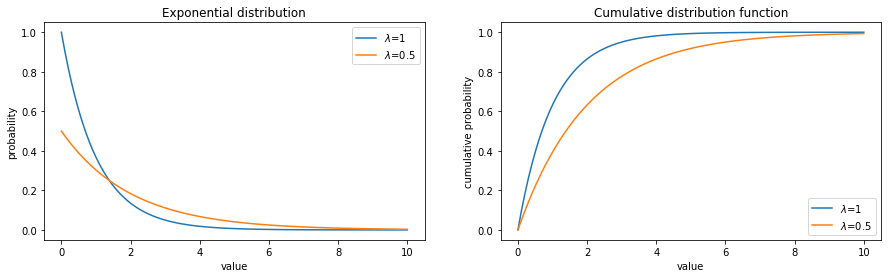

In [73]:
# Экспоненциальное
x_1 = np.linspace(0, 10, 100)
y_1 = sts.expon.pdf(x_1, scale=1/1)
x_2 = np.linspace(0, 10, 100)
y_2 = sts.expon.pdf(x_2, scale=1/0.5)

fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(x_1, y_1, label='$\lambda$=1')
plt.plot(x_2, y_2, label='$\lambda$=0.5')

plt.xlabel('value')
plt.ylabel('probability')
plt.title('Exponential distribution')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
y_11 = sts.expon.cdf(x_1, scale=1/1)
y_22 = sts.expon.cdf(x_2, scale=1/0.5)

plt.plot(x_1, y_11, label='$\lambda$=1')
plt.plot(x_2, y_22, label='$\lambda$=0.5')

plt.xlabel('value')
plt.ylabel('cumulative probability')
plt.title('Cumulative distribution function')
plt.legend(loc='lower right')

plt.show()

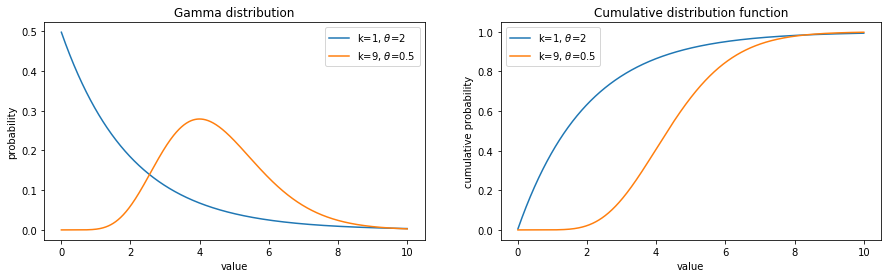

In [101]:
# Гамма-распределение
a_1 = 1
a_2 = 9
x_1 = np.linspace(0.01, 10, 1000)
x_2 = np.linspace(0.01, 10, 1000)

fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(x_1, sts.gamma.pdf(x_1, a_1, 0, 2), label='k=1, $\\theta$=2')
plt.plot(x_2, sts.gamma.pdf(x_2, a_2, 0, 0.5), label='k=9, $\\theta$=0.5')
plt.xlabel('value')
plt.ylabel('probability')
plt.title('Gamma distribution')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(x_1, sts.gamma.cdf(x_1, a_1, 0, 2), label='k=1, $\\theta$=2')
plt.plot(x_2, sts.gamma.cdf(x_2, a_2, 0, 0.5), label='k=9, $\\theta$=0.5')
plt.xlabel('value')
plt.ylabel('cumulative probability')
plt.title('Cumulative distribution function')
plt.legend(loc='upper left')

plt.show()